In [1]:
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
!pip install matplotlib

In [3]:
import os
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/IA3/behavior2/dataset/dataset_aug1.zip -d /content/

Archive:  /content/drive/MyDrive/IA3/behavior2/dataset/dataset_aug1.zip
   creating: /content/dataset_aug1/
   creating: /content/dataset_aug1/correcto/
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_1.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_2.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_3.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_4.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_5.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_6.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_7.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_8.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_0_aug_9.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_1.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_1_aug_0.png  
  inflating: /content/dataset_aug1/correcto/Proyecto 29n_1_aug_1.png  
 

In [8]:
# Configura las transformaciones. Asegúrate de incluir aumentos de datos para combatir el sobreajuste.
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomResizedCrop(224), # Cambiar el tamaño y recortar aleatoriamente las imágenes
    #transforms.RandomHorizontalFlip(), # Voltear horizontalmente las imágenes de manera aleatoria
    transforms.ToTensor(), # Convertir a tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalización para EfficientNet
])

# Cargar dataset
dataset_path = '/content/dataset_aug1'
dataset = ImageFolder(root=dataset_path, transform=transform)

# Dividir en conjuntos de entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

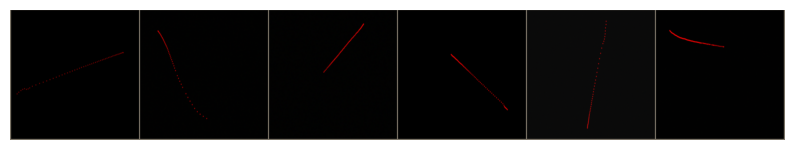

In [ ]:
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convertir de Tensor a numpy
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # desnormalizar
    img = np.clip(img, 0, 1)  # asegurarse de que los valores estén entre 0 y 1
    plt.imshow(img)
    plt.axis('off')  # no mostrar los ejes

def show_images(dataloader, number_of_images=6):
    # Cargar un batch de imágenes
    dataiter = iter(dataloader)
    images, _ = next(dataiter)

    # Crear un grid con las imágenes
    img_grid = torchvision.utils.make_grid(images[:number_of_images])

    # Mostrar las imágenes
    plt.figure(figsize=(10, 10))
    imshow(img_grid)

# Llamar a la función para visualizar imágenes
show_images(train_loader)

In [9]:
model = models.efficientnet_b0(pretrained=True)
# Cambiar la última capa de clasificación
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(dataset.classes))
model = model.to('cuda')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 44.9MB/s]


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
import os
import torch
from tqdm import tqdm

# Configuración del optimizador con weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Función de entrenamiento con early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, patience=5, save_dir='./'):
    best_val_loss = float('inf')
    best_model = None
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Barra de progreso para el entrenamiento
        train_prog = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")

        for images, labels in train_prog:
            images, labels = images.to('cuda'), labels.to('cuda')
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Actualizar la barra de progreso
            train_prog.set_postfix(loss=running_loss / (len(train_prog) * (epoch+1)))

        val_loss = evaluate_model(model, val_loader)
        print(f'Epoch {epoch + 1}, Training Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()
            epochs_no_improve = 0
            # Guardar el mejor modelo
            torch.save(best_model, os.path.join(save_dir, 'bestefficientnetb0.pt'))
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print('Early stopping triggered')
            break

    return best_model

def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

In [ ]:
best=train_model(model=model, train_loader=train_loader, val_loader=val_loader, criterion=criterion, optimizer=optimizer, num_epochs=25, patience=5,save_dir='/content/drive/MyDrive/IA3/behavior2/dataset/best')

Epoch 1/25: 100%|██████████| 73/73 [01:02<00:00,  1.16batch/s, loss=0.493]


Epoch 1, Training Loss: 0.49312711741826304, Validation Loss: 0.49547851713080154


Epoch 2/25: 100%|██████████| 73/73 [01:00<00:00,  1.20batch/s, loss=0.193]


Epoch 2, Training Loss: 0.38525850621804797, Validation Loss: 0.6526719488595661


Epoch 3/25: 100%|██████████| 73/73 [01:00<00:00,  1.21batch/s, loss=0.0972]


Epoch 3, Training Loss: 0.2915939326359801, Validation Loss: 0.30206365177505895


Epoch 4/25: 100%|██████████| 73/73 [01:03<00:00,  1.15batch/s, loss=0.0647]


Epoch 4, Training Loss: 0.25867771969674386, Validation Loss: 0.2860217619883387


Epoch 5/25: 100%|██████████| 73/73 [00:59<00:00,  1.22batch/s, loss=0.0408]


Epoch 5, Training Loss: 0.2037985697133492, Validation Loss: 0.3450855346102464


Epoch 6/25: 100%|██████████| 73/73 [01:00<00:00,  1.20batch/s, loss=0.0336]


Epoch 6, Training Loss: 0.20173311209280606, Validation Loss: 0.2865825475830781


Epoch 7/25: 100%|██████████| 73/73 [00:59<00:00,  1.22batch/s, loss=0.0259]


Epoch 7, Training Loss: 0.18131941130818569, Validation Loss: 0.310943956045728


Epoch 8/25: 100%|██████████| 73/73 [01:01<00:00,  1.18batch/s, loss=0.0272]


Epoch 8, Training Loss: 0.21741343463120394, Validation Loss: 0.30121785598365886


Epoch 9/25: 100%|██████████| 73/73 [01:00<00:00,  1.21batch/s, loss=0.0194]


Epoch 9, Training Loss: 0.17474505749263175, Validation Loss: 0.22142243836271136


Epoch 10/25: 100%|██████████| 73/73 [01:00<00:00,  1.22batch/s, loss=0.0189]


Epoch 10, Training Loss: 0.18861844305153172, Validation Loss: 0.1917120998627261


Epoch 11/25: 100%|██████████| 73/73 [01:02<00:00,  1.18batch/s, loss=0.0111]


Epoch 11, Training Loss: 0.12211503265808298, Validation Loss: 0.5257566435948798


Epoch 12/25: 100%|██████████| 73/73 [00:59<00:00,  1.22batch/s, loss=0.011]


Epoch 12, Training Loss: 0.13240157009089645, Validation Loss: 0.2549633634717841


Epoch 13/25: 100%|██████████| 73/73 [01:02<00:00,  1.17batch/s, loss=0.00819]


Epoch 13, Training Loss: 0.1065167616032166, Validation Loss: 0.15805846712502994


Epoch 14/25: 100%|██████████| 73/73 [01:00<00:00,  1.20batch/s, loss=0.00915]


Epoch 14, Training Loss: 0.12808264417522777, Validation Loss: 0.160120851237719


Epoch 15/25: 100%|██████████| 73/73 [01:00<00:00,  1.20batch/s, loss=0.00483]


Epoch 15, Training Loss: 0.07246511477709122, Validation Loss: 0.2705319366957012


Epoch 16/25: 100%|██████████| 73/73 [01:02<00:00,  1.18batch/s, loss=0.00257]


Epoch 16, Training Loss: 0.04107380049041638, Validation Loss: 0.2075174427836349


Epoch 17/25: 100%|██████████| 73/73 [01:03<00:00,  1.15batch/s, loss=0.00322]


Epoch 17, Training Loss: 0.054800625958070094, Validation Loss: 0.17280562540614292


Epoch 18/25: 100%|██████████| 73/73 [01:01<00:00,  1.18batch/s, loss=0.00312]


Epoch 18, Training Loss: 0.05611483868823884, Validation Loss: 0.2690773984711421
Early stopping triggered


In [12]:
model.load_state_dict(torch.load('/content/drive/MyDrive/IA3/behavior2/dataset/best/bestefficientnetb0.pt'))

<All keys matched successfully>

In [13]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, models, datasets
from torch import nn
from torchvision.datasets import ImageFolder

# Definir la función de evaluación
def evaluate_model(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to('cuda'), labels.to('cuda')
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(dataloader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

In [14]:
# Definir el criterio de pérdida
criterion = nn.CrossEntropyLoss()

# Evaluar el modelo
loss, accuracy = evaluate_model(model, val_loader, criterion)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%')

Loss: 0.0744, Accuracy: 96.91%
